<a href="https://colab.research.google.com/github/enziwolf/INF395T3/blob/master/%5BANN%5DTaller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 3 - Modelos Avanzados </H3>
<hr style="height:2px;border:none"/>

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 24 de Julio en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 7 de Agosto, horario de clases.
* Fecha de entrega de vídeo y Jypter (notebook): 7 de Agosto.
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Desafío por Método  
[2.](#segundo) Desafío por Score

#### <a id="primero"></a>
## 1. Desafío por Método: Neural Information Retrieval

<img src="https://sites.google.com/site/xinchaoliweb/_/rsrc/1453028120793/research/ObjectRetrieval.jpg" title="Title text" width="80%" />

La tarea de un *sistema de recuperación de información (IR)* consiste en entregar los elementos de una cierta base de datos que resultan más relevantes para una determinada "consulta" (query) al sistema. Esta "consulta" se entrega al sistema en un formato pre-acordado con el usuario: por ejemplo podría tratarse de la conjunción de ciertas palabras claves.

**Recuperación por Contenido:** En muchas aplicaciones, la base de datos está formada por objetos poco estructurados y ricos en contenido como una imagen, un video o una canción, e interesa poder recuperar los objetos más "similares" a una determinada query en términos semánticos. En este caso, más que términos claves, es práctico que la query pueda ser del mismo tipo de los **objetos** indexados: una imagen para recuperar imágenes o una canción para recuperar canciones. En este caso, el IR debe aprender qué objetos son los relevantes para una query porque la búsqueda se hace ya no guiada por términos claves o por instrucciones muy estructuradas, sino por contenido. Esto es aplicado a diferentes dominios: texto, imágenes, audio, vídeos. 

**Recuperación Inter-dominio:** En el problema de recuperación de información inter-dominio (**cross-modal** ó **cross-domain**), el objetivo es recuperar los objetos similares a un objeto de otro dominio. Por ejemplo, desde un texto que describe una situación, recuperar las imágenes similares (*Text2Image*), o desde una imagen recuperar los textos más similares a la situación en la imagen (*Image2Text*). Este último problema (Image2Text) puede ser similar a lo que se hace en Image Captioning pero el objetivo no es generar un texto nuevo, sino que se deben encontrar en un conjunto bajo una cierta similaridad.

<img src="http://www.svcl.ucsd.edu/projects/crossmodal/images/problem.png" title="Title text" width="50%" />

Su tarea será utilizar redes neuronales para construir un IR basado en contenido del tipo
1. mono-modal *image-2-image*  
2. bi-modal *text-2-image*  
3. bi-modal *image-2-text*  
> **Importante**: Deberá escoger y resolver 2 de los 3 problemas 

Para testear y validar su solución tendrá a disposición diferentes datasets.
Para el problema 1 puede utilizar cualquier dataset de imágenes RGB etiquetados que conozca (por ejemplo CIFAR) y construir los pares de imágenes en base a las categorías del problema: si comparten la misma clase se puede crear el par (imagen1-clase-K,imagen2-clase-K). Para el problema 2 y 3 utilice el dataset **Flickr8k**, una colección medianamente grande de imágenes que contiene 3 breves descripciones por cada una. Para entrenar puede utilizar sólo los datos de **Flickr8k** o algún otro dataset, con pares del tipo (imagen,texto), para complementar su propuesta.

> Flickr8k: https://github.com/jbrownlee/Datasets/releases/tag/Flickr8k  
> También podría utilizar algún otro como MSCOCO: https://cocodataset.org/#captions-2015  

Recuerde que en fase de test, el sistema debe recibir una consulta y devolver una lista de resultados, que podemos asumir serán una serie de identificadores sobre la base de datos, por ejemplo: 2030, 3, 10, 120, 617.

Su presentación de la solución debe incluir una clara descripción de (1) cómo se representan las consultas/objetos para ingresar al sistema, (2) cómo 
se entrena el modelo, (3) cómo evalúa el resultado final.

* **Bonus** Se asigná un bonus de hasta 20 puntos sobre toda la tarea, a quienes exploren eventuales **sesgos de género** en el modelo, es decir, si la recuperación de los objetos evidencia diferencias significativas entre imágenes masculinas o femeninas (esas están anotadas). Por ejemplo, cuando ante la palabra "conducir" aperecen muchas más imágenes con personas clasificadas como masculino ó bien cuando la palabra "woman" o "man" se encuentra en los textos, se recuperan imágenes con un cierto *sesgo* (*bias*) visual.


## Mono Modal Image 2 Image

Para esta sección se trabajará con el dataset CIFAR-10. Un dataset de imagenes RGB de 32x32. Debido al tamaño de las imágenes algunas pueden ser difícil de diferenciar en la presentación de resultados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


El flujo de trabajo corresponderá en la utilización de un modelo pre-entrenado para extraer características. Luego se almacenarán las características extraídas del dataset de entrenamiento y esa será la base de datos. A parte tendremos la imágenes originales, pero estas solo serán utilizadas a la hora de presentarlas como resultados de la query. 


In [ ]:
#Import dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(trainx, trainy), (testx, testy) = cifar10.load_data() #X e Y-> numpy.ndarray

x_train = trainx[:10000]
y_train = to_categorical(trainy[:10000])

x_test = testx[:1000]
y_test = to_categorical(testy[:1000])

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 11s 0us/step
Train: X=(10000, 32, 32, 3), y=(10000, 10)
Test: X=(1000, 32, 32, 3), y=(1000, 10)


El modelo pre-entrenado que elegimos es VGG16 porque permite trabajar con imágenes pequeñas (32x32). Se congela este modelo en entrenamiento porque tardaría mucho en entrenarse y son muchos parámetros para la pequeña cantidad de imágenes que utilizaremos al trabajar.

Como el modelo originalmente fue entrenado en el dataset de imagenet se debe utilizar otra capa de salida. Hay algunas capas finales del modelo que se dejan fuera cuando queremos utilizarlas para extraer atributos. Debido a esto es que hay que entrenar las nuevas capas que agregaremos al modelo, en el problema original: clasificación multi-label excluyente (solo 1 etiqueta por imagen).

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical #one_hot_encoder
from tensorflow.keras import layers as capas
base_model = VGG16(input_shape=(32,32,3),include_top=False) #se carga con los mismo pesos

#solo se entrenaran las capas custom

for layer in base_model.layers:
    layer.trainable=False

inputs = keras.Input(shape=(32, 32, 3))
hidden = base_model(inputs,training=False)
hidden = capas.Flatten()(hidden)
hidden = capas.Dense(4096)(hidden)
outputs = capas.Dense(10,activation='softmax')(hidden)

model = keras.Model(inputs, outputs)
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4096)              2101248   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


El entrenamiento tarda un poco y no nos preocupamos al 100% de tener una red súper buena para clasificar porque ese no es el objetivo. Además que estaremos comparando representaciones del conjunto Test con las de Train.


In [ ]:
x_train_p = preprocess_input(x_train)
x_test_p = preprocess_input(x_test)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


model.fit(x_train_p, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test_p, y_test))

Epoch 1/20
313/313 [==============================] - 123s 392ms/step - loss: 4.1072 - accuracy: 0.5108 - val_loss: 3.4629 - val_accuracy: 0.5810
Epoch 2/20
313/313 [==============================] - 122s 391ms/step - loss: 3.2613 - accuracy: 0.5740 - val_loss: 4.0711 - val_accuracy: 0.5530
Epoch 3/20
313/313 [==============================] - 122s 388ms/step - loss: 3.1169 - accuracy: 0.5993 - val_loss: 4.2935 - val_accuracy: 0.5330
Epoch 4/20
313/313 [==============================] - 122s 390ms/step - loss: 3.1544 - accuracy: 0.6004 - val_loss: 3.8253 - val_accuracy: 0.5620
Epoch 5/20
313/313 [==============================] - 121s 388ms/step - loss: 2.9581 - accuracy: 0.6048 - val_loss: 3.8926 - val_accuracy: 0.5910
Epoch 6/20
313/313 [==============================] - 125s 399ms/step - loss: 2.9959 - accuracy: 0.6119 - val_loss: 4.1833 - val_accuracy: 0.5550
Epoch 7/20
313/313 [==============================] - 122s 389ms/step - loss: 2.9398 - accuracy: 0.6131 - val_loss: 3.7546 -

Después de entrenar eliminamos la última capa del modelo, la Softmax para clasificar. Y con el nuevo modelo extractor de atributos construimos la base de datos y la representación de cada elemento del conjunto de prueba para hacer queries.

In [ ]:
from tensorflow.keras.models import Model
#despues de entrenar el modelo quitamos la capa de output
capas_modelo = model.layers
capas_modelo = capas_modelo[:-1]
feature_extractor = Model(inputs=capas_modelo[0].input,outputs=capas_modelo[-1].output)

#construimos la base de datos de las features
features =feature_extractor.predict(x_train_p)
bd = {}
key = 0
for f in features:
    bd[key] = f
    key+=1

#generamos las posibles queries
posibles_queries = feature_extractor.predict(x_test_p)

Para hacer las queries se utiliza $1 - distancia\, coseno(query,database)$. El elemento de la query es comparado con los elementos de la BD y después se retorna una cantidad $n$ de elementos de la BD con los puntajes más altos.

Para evaluar este método lo único que tenemos es la clase original a la que pertenecen los elementos. Así que la métrica que utilizamos es la cantidad promedio de imagenes pertenecientes a la misma clase que el elemento de la query. 

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine as cosine_distance
def get_best_results(prediccion,database,n_result=5):
    similarities = []
    for key,value in database.items():
        similarities.append((1-cosine_distance(prediccion,value),key)) #1-cd = similarity
    similarities.sort(reverse=True)
    return similarities[:n_result]

def get_label(pred):
    return np.argmax(pred)

def coincidences(label,query_result,labels,index):
    total = 0
    for i in query_result:
        query_label = get_label(labels[i[1]]) #en 0 esta el score
        if query_label == label:
            total +=1
    return total

def evaluate_query(posible_queries,database,query_labels,database_labels,n_results=5):
    coincidencias_por_elemento = {} #para hacer el plot 
    total_coincidences = 0
    iteracion = 0
    for query,label in zip(posible_queries,query_labels):
        results = (get_best_results(query,database,n_results))
        l = get_label(label)
        coincidencias_en_query = coincidences(l,results,database_labels,iteracion)
        total_coincidences += coincidencias_en_query
        coincidencias_por_elemento[iteracion] = coincidencias_en_query #iteracion sirve de index
        iteracion += 1
    mensaje = "Total de " +str(total_coincidences/iteracion) + " coincidencias promedio de: " + str(n_results)
    return mensaje,coincidencias_por_elemento
msg,diccio = evaluate_query(posibles_queries,bd,y_test,y_train,n_results=5)

In [ ]:
print(msg)
print("Maximo ocurrencias:",max(diccio.values()))
print("Minimo ocurrencias: ",min(diccio.values()))

Total de 2.353 coincidencias promedio de: 5
Maximo ocurrencias: 5
Minimo ocurrencias:  0


In [ ]:
diccio

{0: 0,
 1: 4,
 2: 5,
 3: 1,
 4: 3,
 5: 2,
 6: 3,
 7: 4,
 8: 1,
 9: 3,
 10: 5,
 11: 5,
 12: 2,
 13: 1,
 14: 3,
 15: 0,
 16: 2,
 17: 2,
 18: 3,
 19: 4,
 20: 1,
 21: 5,
 22: 0,
 23: 3,
 24: 0,
 25: 1,
 26: 0,
 27: 0,
 28: 2,
 29: 4,
 30: 4,
 31: 3,
 32: 4,
 33: 1,
 34: 3,
 35: 1,
 36: 0,
 37: 2,
 38: 4,
 39: 5,
 40: 0,
 41: 5,
 42: 2,
 43: 1,
 44: 3,
 45: 4,
 46: 3,
 47: 2,
 48: 3,
 49: 2,
 50: 1,
 51: 2,
 52: 0,
 53: 1,
 54: 4,
 55: 4,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 3,
 61: 3,
 62: 2,
 63: 2,
 64: 5,
 65: 0,
 66: 4,
 67: 3,
 68: 0,
 69: 3,
 70: 2,
 71: 2,
 72: 5,
 73: 2,
 74: 0,
 75: 4,
 76: 1,
 77: 3,
 78: 1,
 79: 4,
 80: 5,
 81: 4,
 82: 3,
 83: 0,
 84: 3,
 85: 0,
 86: 2,
 87: 0,
 88: 3,
 89: 4,
 90: 2,
 91: 1,
 92: 0,
 93: 2,
 94: 3,
 95: 2,
 96: 4,
 97: 4,
 98: 3,
 99: 1,
 100: 0,
 101: 3,
 102: 1,
 103: 1,
 104: 5,
 105: 5,
 106: 0,
 107: 5,
 108: 3,
 109: 1,
 110: 2,
 111: 4,
 112: 4,
 113: 1,
 114: 4,
 115: 2,
 116: 5,
 117: 0,
 118: 2,
 119: 0,
 120: 0,
 121: 4,
 122: 3,
 12

De esta evaluación tenemos algunos elementos del conjunto Test que son relacionados a 5 elementos de su misma clase en el conjunto Train, mientras que otros con ninguno. 

El 5 es el $n$ por defecto. Se buscan las 5 imágenes con mayor puntajes y es fácilmente modificable en el código y no requiere una re-extracción de atributos.

A continuación se pueden ver algunos querysets en imágenes

Imagen ingresada


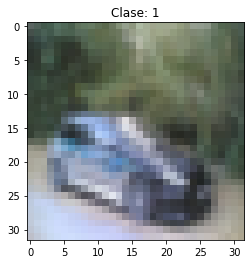

Query Results


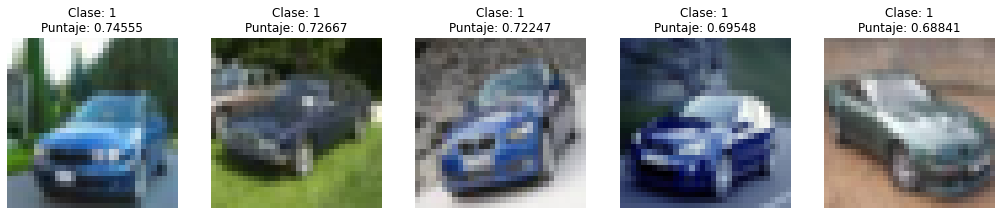

In [ ]:
import matplotlib.pyplot as plt
def plot_results(prediccion,database,imagenes,imagenes_labels,imagen,label,n_result=5):
    resultados = get_best_results(prediccion,database,n_result)
    print("Imagen ingresada")
    origin_class = get_label(label)
    plt.imshow(imagen)
    plt.title("Clase: "+str(origin_class))
    plt.show()

    print("Query Results")
    fig = plt.figure(figsize=(25,15))
    for n in range(1,n_result+1):
        fig.add_subplot(4, 7, n)
        indice = resultados[n-1][1]
        puntaje = resultados[n-1][0]
        img = imagenes[indice]
        titulo = "Clase: " + str(get_label(imagenes_labels[indice])) + "\n" + "Puntaje: " + str(puntaje)[:7]
        plt.imshow(img)

        plt.title(titulo)
        plt.axis('off')

def ver_querysets(posible_queries,query_label,database,database_labels,imagenes_db,imagenes_query,index,n_result=5):
    pred = posibles_queries[index]
    pred_label = query_label[index]
    img = imagenes_query[index]
    plot_results(prediccion=pred,database=database,imagenes=imagenes_db,imagenes_labels=database_labels,
                 imagen=img,label=pred_label,n_result=5)
    
ver_querysets(posibles_queries,y_test,bd,y_train,x_train,x_test,961,5)

In [ ]:
analisis_diccio = {}
for index,coincidences in diccio.items():
    index_label = get_label(y_test[index])
    if index_label not in analisis_diccio.keys():
        analisis_diccio[index_label] = [coincidences,1]
    else:
        analisis_diccio[index_label][0] += coincidences
        analisis_diccio[index_label][1] +=1


for k,v in analisis_diccio.items():
    analisis_diccio[k] = [v[0],v[1],v[0]/v[1]]
analisis_diccio

{0: [274, 103, 2.6601941747572817],
 1: [248, 89, 2.7865168539325844],
 2: [198, 100, 1.98],
 3: [131, 103, 1.2718446601941749],
 4: [177, 90, 1.9666666666666666],
 5: [193, 86, 2.244186046511628],
 6: [324, 112, 2.892857142857143],
 7: [252, 102, 2.4705882352941178],
 8: [281, 106, 2.650943396226415],
 9: [275, 109, 2.522935779816514]}

## Bi Modal Text to Image

En esta sección se trabajará en la construcción de una base de datos que acepte como input una oración y como output entregue una cantidad de imágenes relacionadas al input.

Para esto utilizaremos un efoque DeViSe $\rightarrow$ Deep Visual Semantic Embedding. Esto significa que utilizaremos un word embedder para vectorizar las oraciones y por otro lado utilizaremos una red convolucional para extraer características de la imagen. El input del modelo será la imagen en bruto, solo que serán re-dimensionadas ya que el dataset tiene varias dimensiones y el output esperado será el vector correspondiente al embedding de la oración que está asociado a la imagen. 

El modelo buscará representar las imágenes como un vector de texto al final.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Para el embedder utilizaremos un sentence embedder que ya fue entrenado llamdo "sister" (SImple SenTence EmbeddeR). El método que realiza este sentence embedder es "Element-Wise mean of word embeddings". Cada palabra de la oración se vectoriza a un espacio de dimensión N, para efectos de este trabajo, cada palabra se vectoriza a un vector de longitud 300. 

Después saca la media *component-wise* para obtener un vector de largo 300 que será la vectorización de la oración.

In [ ]:
pip install sister #SImple SenTence EmbeddeR)

     |████████████████████████████████| 71kB 2.9MB/s 
     |████████████████████████████████| 21.5MB 71.7MB/s 
  Created wheel for sister: filename=sister-0.1.10-cp36-none-any.whl size=5393 sha256=8e96100743cd83e3007764f95ecca8bd466a291ce45bf664e41650305abd21a5
  Stored in directory: /root/.cache/pip/wheels/69/8d/01/c066cc2e5c98891fc1af11f393882ee718b6026f3f8b0623b0
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3020355 sha256=ab34358b01db9b9b4a20b2cae4a14488778521252d76d321aa06db3af73cb639
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built sister fasttext


In [ ]:
%%time 
import sister
embedder = sister.MeanEmbedding(lang="en") #descarga el modelo pre entrenado de fasttext, tiempo variable
#vectores de dimension (300,)

Loading model...
CPU times: user 35.6 s, sys: 15.7 s, total: 51.3 s
Wall time: 4min 3s


La métrica que utilizaremos para hacer la query y el entrenamiento es la Similitud Coseno (1 - Distancia Coseno)

$$
CosDis (a,b) = \frac{\vec{a}\cdot \vec{b}}{||\vec{a}||\cdot ||\vec{b}||}
$$

In [ ]:
from scipy.spatial.distance import cosine as cosine_distance

def similarity(vec1,vec2):
    return 1 - cosine_distance(vec1,vec2)



In [ ]:
root_dir = "/content/drive/My Drive/ANN T3/flick8/flick8text/" #carpeta con los archivos de texto
images_path = "/content/drive/My Drive/ANN T3/flick8/flick8images/"

### Train y Validation Set

#### Par (Id imagen, Caption)

Primero hay que generar los pares (id_imagen, caption). Como las imágenes tienen varios captions y solamente los captions de test (que no sirven de momento) han sido evaluados por personas, asumimos que todos los captions de las imágenes de entrenamiento y validación son válidos (no están los recursos para determinar qué sirve y qué no en train y validation). Esto generará varios outputs para un solo input en el entrenamiento. 

De un vistazo al archivo de tokens.txt se ve que las descripciones intentan abarcar distintos aspectos de la imagen en vez de ser una sola descripción extensa y detallada.

In [ ]:
#Construir lo pares (imagen, texto)
#pero una imagen puede tener mas textos asociados asi que habra pares (x1,t1),(x1,t2) , (x2,t3)...
train_path = root_dir + "trainImages.txt" #Ninguna imagen de train fue evaluada
val_path = root_dir + "devImages.txt" #Ninguna imagen de validation fue evaluada
captions_path = root_dir + "token.txt"


train_pairs = {}
validation_pairs = {}

train_file = open(train_path,"r")
for img_id in train_file:
    img_id = img_id.strip()
    train_pairs[img_id] = [] #lista vacia, con los captions 
train_file.close()

validation_file = open(val_path,"r")
for img_id in validation_file:
    img_id = img_id.strip()
    validation_pairs[img_id] = [] #lista vacia, con los captions 
validation_file.close()

#Asignar los captions a las imagenes
captions_file = open(captions_path,"r")
for linea in captions_file:
    identifier,caption = linea.strip().split("\t")
    img_id,_ = identifier.split("#")
    #checkear si es train/validation/test
    #se añade al caption de train
    if img_id in train_pairs.keys():
        if caption not in train_pairs[img_id]:
            train_pairs[img_id].append(caption)
    #se añade al caption de validation
    elif img_id in validation_pairs.keys():
        if caption not in validation_pairs[img_id]:
            validation_pairs[img_id].append(caption)
    #caption de test no importa
    else:
        continue

In [ ]:
largos = set()
for v in train_pairs.values():
    largos.add(len(v))

largos_val = set()
for v in validation_pairs.values():
    largos_val.add(len(v))

print(len(train_pairs),largos) #6000 train images, con 4-5 captions c/u
print(len(validation_pairs),largos_val) #1000 validation images con 5 captions c/u

6000 {4, 5}
1000 {5}


#### Par (Id Imagen, Representacion)

En este caso cada imagen tendrá una única representación para el modelo, por eso es que se tendrán varios output para un solo input.  

Con la construcción de los pares (Id Imagen, Representacion) se podrá construir el conjunto final correspondiente a (Representacion, Caption) para realizar el entrenamiento del modelo.

In [ ]:
#dimension mas pequeña:
from os import walk
files = walk(images_path)
names = []
for _,_,f in files:
    for x in f:
        names.append(x)

contador = 0
total = len(names)

flaf = 0.1
dims = set()
for x in names:
    img = img_to_array(load_img(images_path+x))
    dims.add(img.shape)
    contador +=1
    if contador/total>flaf:
        print(flaf)
        flaf +=0.1

chica_x = 1000
chica_y = 1000
max = 1000000

for tupla in dims:
    score = tupla[0]*tupla[1]
    if score < max:
        chica_x = tupla[0]
        chica_y = tupla[1]
        max = score
    
print(chica_x,chica_y)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

images_path = "/content/drive/My Drive/ANN T3/flick8/flick8images/"
#son tantas que la RAM de collab se muere
filenames = []
labels = []

counter = 0

for k,v in train_pairs.items():
    #for cap in v:
    for i in range(1):
        filenames.append(k)
        labels.append(v[i])
    counter += 1
    if counter == 1000:
        break

filenames_val = []
labels_val = []
for k,v in validation_pairs.items():
    #for cap in v:
    for i in range(1):
        filenames_val.append(k)
        labels_val.append(v[i])

filenames = np.array(filenames).reshape((len(filenames),1))
labels = np.array(labels).reshape((len(labels),1))


filenames_val = np.array(filenames_val).reshape((len(filenames_val),1))
labels_val = np.array(labels_val).reshape((len(labels_val),1))

print("Train Shapes",filenames.shape,labels.shape)
print("Val Shapes",filenames_val.shape,labels_val.shape)

Train Shapes (1000, 1) (1000, 1)
Val Shapes (1000, 1) (1000, 1)


In [ ]:
from sklearn.utils import shuffle

filenames_shuffled, labels_shuffled = shuffle(filenames,labels)
val_x_shuffle, val_y_shuffle = shuffle(filenames_val,labels_val)

#np.save('train_labels_shuffled', labels_shuffled)
#np.save('filenames_shuffled.npy', filenames_shuffled)

In [ ]:
%%time
import sister
embedder = sister.MeanEmbedding(lang="en") #descarga el modelo pre entrenado de fasttext, tiempo variable

Loading model...


CPU times: user 730 ms, sys: 5.18 s, total: 5.91 s
Wall time: 53.3 s


In [ ]:
from tensorflow.keras.utils import Sequence

class My_Custom_Generator(Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size):
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self):
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx):
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

    vectorized_y = np.array([embedder(x[0]) for x in batch_y])

    imagenes = np.array([img_to_array(load_img(images_path+x[0],target_size=(191,228))) for x in batch_x])

    return imagenes,vectorized_y


batch_size = 32

my_training_batch_generator = My_Custom_Generator(filenames_shuffled, labels_shuffled, batch_size)
my_validation_batch_generator = My_Custom_Generator(val_x_shuffle, val_y_shuffle, batch_size)
pasos_entrenamiento = filenames_shuffled.shape[0]
pasos_validacion = val_x_shuffle.shape[0]

Para el modelo utilizaremos el mismo que utilizamos en el Challenge del Taller 1 ya que nos dió muy buenos resultados. Simplemente que esta vez la capa de salida será una capa densa de 300 unidades con activación lineal ya que la gracia es hacer una regresión de la imagen el texto (o embedding de texto).

Al igual que en el Challenge 1, el entrenamiento tiene dos partes, primero entrenamos la capas custom y después el resto con el mismo conjunto de datos. Debido al tiempo de entrenamiento limitamos el train a solo 1000 imágenes de la totalidad y utilizamos 1 solo caption por imágene (siendo que c/u tenía 4-5 captions válidos). Si utilizábamos todo se tenía un conjunto de entrenamiento de, aproximadamente, 30.000 imágenes lo que demoraba 2 horas por epoch (mucho tiempo para nosotros).

In [ ]:
## Transfer learning, la idea es cargar un modelo, congelar las capas no originales, entrenar las nuevas y luego entrenar le modelo entero
from tensorflow import keras
from tensorflow.keras import layers

#Como tenemos pocos ejemplos es bueno hacer data augmentation que son variaciones de los datos de entrada
#aumentan el tamaño de prueba.
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

base_model = keras.applications.InceptionResNetV2(weights="imagenet",input_shape=(191,228,3),include_top=False)
base_model.trainable = False

inputs = keras.Input(shape=(191, 228, 3))
x = data_augmentation(inputs) 

#Se agrega una capa de normalizacion
#Esto hace que los cálculos se ejecuten con mayor rapidez 
#El gradiente no se aloque por valores muy altos de pixeles
#La data queda centrada y las "features" quedan en un rango mas acotado
#Además, como hay compartición de pesos, esto ayuda a que la compartición sea mas facil
#porque asi se tienen dos pesos similares y no uno muy grande y otro muy chico.
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5,127.5,127.5]) #se normaliza cada canal
var = mean**2
# Scale inputs 
x = norm_layer(x)
norm_layer.set_weights([mean, var]) #pesos iniciales son la media y varianza de cada canal


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout, evita overfitting seteando los pesos de algunas a 0
#en cada step durante el entrenamiento
outputs = keras.layers.Dense(300)(x) #capa de salida, dim 300, del embedding
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 191, 228, 3)]     0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 191, 228, 3)       0         
_________________________________________________________________
normalization_4 (Normalizati (None, 191, 228, 3)       7         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 4, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)              

In [ ]:
from tensorflow.keras.losses import CosineSimilarity as cos_sim 
#en keras Cos_Sim va de 0 a -1 donde -1 es muy similar lo que funciona en la minimizacion
model.compile(loss=cos_sim(axis=1),
              optimizer=keras.optimizers.Adam(learning_rate=1e-04))

model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(pasos_entrenamiento // batch_size),
                   epochs = 10,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   validation_steps = int(pasos_validacion // batch_size))

Epoch 1/10
31/31 [==============================] - 373s 12s/step - loss: -0.8505 - val_loss: -0.8601
Epoch 2/10
31/31 [==============================] - 375s 12s/step - loss: -0.8539 - val_loss: -0.8616
Epoch 3/10
31/31 [==============================] - 367s 12s/step - loss: -0.8556 - val_loss: -0.8627
Epoch 4/10
31/31 [==============================] - 374s 12s/step - loss: -0.8577 - val_loss: -0.8637
Epoch 5/10
31/31 [==============================] - 375s 12s/step - loss: -0.8595 - val_loss: -0.8645
Epoch 6/10
31/31 [==============================] - 374s 12s/step - loss: -0.8599 - val_loss: -0.8651
Epoch 7/10
31/31 [==============================] - 371s 12s/step - loss: -0.8622 - val_loss: -0.8657
Epoch 8/10
31/31 [==============================] - 373s 12s/step - loss: -0.8626 - val_loss: -0.8663
Epoch 9/10
31/31 [==============================] - 371s 12s/step - loss: -0.8635 - val_loss: -0.8668
Epoch 10/10
31/31 [==============================] - 374s 12s/step - loss: -0.8645

In [ ]:
#2da parte del training
base_model.trainable = True

model.compile(loss=cos_sim(axis=1),
              optimizer=keras.optimizers.Adam(learning_rate=1e-04))


history = model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(pasos_entrenamiento // batch_size),
                   epochs = 5,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   validation_steps = int(pasos_validacion // batch_size))

Epoch 1/5
31/31 [==============================] - 1005s 32s/step - loss: -0.8704 - val_loss: -0.8732
Epoch 2/5
31/31 [==============================] - 1012s 33s/step - loss: -0.8787 - val_loss: -0.8738
Epoch 3/5
31/31 [==============================] - 1035s 33s/step - loss: -0.8828 - val_loss: -0.8735
Epoch 4/5
31/31 [==============================] - 1009s 33s/step - loss: -0.8878 - val_loss: -0.8731
Epoch 5/5
31/31 [==============================] - 1001s 32s/step - loss: -0.8921 - val_loss: -0.8730


In [ ]:
#guardar modelo post train
model.save("/content/drive/My Drive/ANN T3/modelos/txtimg.h5")

In [ ]:
from tensorflow.keras.models import load_model
#load_model
path_to_model = "/content/drive/My Drive/ANN T3/modelos/txtimg.h5"
text_to_image = load_model(path_to_model)

### Test Set

Después de que se entrena el modelo lo utilizamos para representar las imágenes del conjunto de prueba en un vector de largo 300. Estos vectores de largo 300 serán nuestra base de datos (ID_Imagen, Repr).

Después la BD acepta como input una oración y utiliza el embedder pre-entrenado para hacer su respectiva representación. A partir de esta representación utiliza la similaridad coseno para sacar el Top-N de imágenes mas similares. 

In [ ]:
#Annotations es para el conjunto test :/
crowd_flower = root_dir + "CrowdFlowerAnnotations.txt"
expert_op = root_dir + "ExpertAnnotations.txt"
#Determinar la mejor oracion para una imagen, hay opinion de expertos y opinion de CrowdFlower

def crowd_score(tupla):
    img_id, tag_id, yes_percent, n_yes, n_no = tupla
    n_yes = int(n_yes)
    yes_percent = float(yes_percent)
    return n_yes*yes_percent

#probar con otro crowd_score (solo %, o solo frec yes)

def expert_score(tupla):
    img_id, tag_id, op1, op2, op3 = tupla
    op1 = int(op1)
    op2 = int(op2)
    op3 = int(op3)
    return (op1+op2+op3)/3

#Opinion CrowdFlower
#Aqui hay que elegir la que mejor lo describe %yes o n_yes 
# img_id, tag_id, yes_percent, n_yes, n_no
crowd_diccio = {}
crowd_file = open(crowd_flower,"r")
for linea in crowd_file:
    tupla = tuple(linea.strip().split("\t"))
    id_img = tupla[0]
    if id_img in crowd_diccio.keys():
        prev_score = crowd_score(crowd_diccio[id_img])
        new_score = crowd_score(tupla)
        if new_score > prev_score:
            crowd_diccio[id_img] = tupla
    else:
        crowd_diccio[id_img] = tupla

crowd_file.close()

#Opinion Expertos
#Aquí hay que promediar la opinion de los 3 expertos 1 malo, 4 mejor
expert_diccio = {}
expert_file = open(expert_op,"r")
for linea in expert_file:
    tupla  = tuple(linea.strip().split("\t"))
    id_img = tupla[0]
    if id_img in expert_diccio.keys():
        prev_score = expert_score(expert_diccio[id_img])
        new_score = expert_score(tupla)
        if new_score > prev_score:
            expert_diccio[id_img] = tupla
    else:
        expert_diccio[id_img] = tupla
expert_file.close()
print("Crowd_Flower juzgó",len(crowd_diccio),"Imágenes")
print("Expertos juzgaron",len(expert_diccio),"Imágenes")

#Juzgaron las mismas imagenes
flag = True
for img in crowd_diccio.keys():
    if img not in expert_diccio.keys():
        flag = False

if flag:
    print("Mismas imágenes en ambos conjuntos") #esto sale asi que el codigo de abajo funciona (:
else:
    print("Juzgaron distintas imágenes")

#Determinar el mejor tag para cada imagen
#Para expertos 1 y 2 es mucha inseguridad, asi que si el score de expertos es menor a 2.5 elegimos a CrowdFlower
#Aqui generamos los pares (imagen,caption)
test_image_cap = {}
for id, tupla in crowd_diccio.items():
    expert_choice = expert_diccio[id]
    if tupla[1] != expert_choice[1]:
        if expert_score(expert_choice) < 2.5:
            test_image_cap[id] = tupla[1]
        else:
            test_image_cap[id] = expert_choice[1]
    else:
        test_image_cap[id] = tupla[1]

Crowd_Flower juzgó 1000 Imágenes
Expertos juzgaron 1000 Imágenes
Mismas imágenes en ambos conjuntos


In [ ]:
#pasar de id_caption al caption
token_path = "/content/drive/My Drive/ANN T3/flick8/flick8text/token.txt"
token_file = open(token_path,"r")


test_captions_final = {}

for linea in token_file:
    c_id,descp = linea.strip().split("\t")
    if c_id in test_image_cap.values():
        for k,v in test_image_cap.items():
            if v == c_id:
                test_captions_final[k] = descp

len(test_captions_final)


1000

In [ ]:
for k,v in test_captions_final.items():
    print(k,v)
    break

1056338697_4f7d7ce270.jpg A woman is signaling is to traffic , as seen from behind .


In [ ]:
#por memoria trabajaremos con batches
import numpy as np
test_files = [x for x in test_captions_final.keys()]
test_files = np.array(test_files).reshape(len(test_files),1)

In [ ]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
class TestingGenerator(Sequence) :
  
  def __init__(self, image_filenames, batch_size):
    self.image_filenames = image_filenames
    self.batch_size = batch_size
    
    
  def __len__(self):
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx):
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    imagenes = np.array([img_to_array(load_img(images_path+x[0],target_size=(191,228))) for x in batch_x])
    return imagenes,batch_x


batch_size = 250

test_generator = TestingGenerator(test_files,batch_size)

In [ ]:
def get_best_captions(batch,all_captions):
    best = {}
    for x in batch:
        best[x[0]] = all_captions[x[0]]
    return best

#imagenes,names = test_generator.__getitem__(3)
#recommended_captions = get_best_captions(names,test_captions_final)

In [ ]:
%%time

total_iter = test_generator.__len__()

database = {}

for i in range(total_iter):
    imagenes,names = test_generator.__getitem__(i)
    predicciones = text_to_image.predict(imagenes,verbose=1) #base de datos
    for x,y in zip(names,predicciones):
        database[x[0]] = y

8/8 [==============================] - 42s 5s/step
CPU times: user 6min 22s, sys: 3.38 s, total: 6min 25s
Wall time: 10min 53s


Usted busco: boat 
Aquí estan los resultados
Query Results


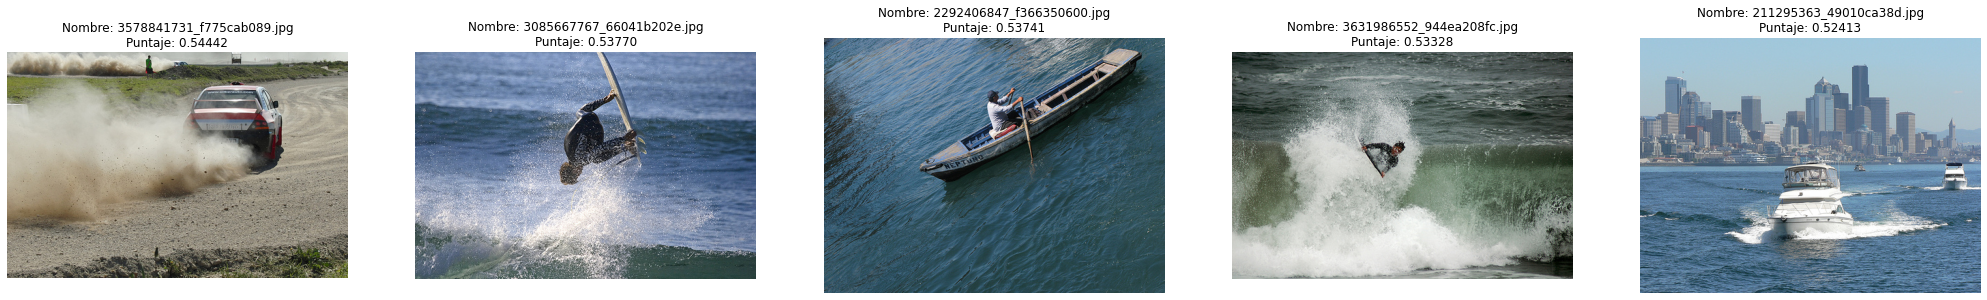

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def database_results(database,sentence,embedder,n_results=5):
    vector = embedder(sentence)
    scores = []
    for k,v in database.items():
        p = similarity(v,vector)
        scores.append((p,k))
    
    scores.sort(reverse=True)

    return scores[:n_results]

search_path = "/content/drive/My Drive/ANN T3/flick8/flick8images/"

def plot_queryresults(query_result,img_path,oracion,n_result=5):

    print("Usted busco:",oracion,"\nAquí estan los resultados")

    print("Query Results")
    fig = plt.figure(figsize=(50,50))
    for n in range(1,n_result+1):
        fig.add_subplot(4, 7, n)
        nombre = query_result[n-1][1]
        puntaje = query_result[n-1][0]
        img = load_img(images_path+nombre)

        titulo = "Nombre: " + nombre + "\n" + "Puntaje: " + str(puntaje)[:7]
        plt.imshow(img)

        plt.title(titulo)
        plt.axis('off')

oracion = "boat" #idealmente usar captions relacionados a imagenes que haya en test

plot_queryresults(database_results(database,oracion,embedder,5),search_path,oracion)

In [ ]:
similarity(embedder("male"),embedder("female"))

0.8636882305145264

In [ ]:
test_captions_final

{'1056338697_4f7d7ce270.jpg': 'A woman is signaling is to traffic , as seen from behind .',
 '2934359101_cdf57442dc.jpg': 'A woman is signaling is to traffic , as seen from behind .',
 '3027397797_4f1d305ced.jpg': 'A young boy in swimming trunks is walking with his arms outstretched on the beach .',
 '127490019_7c5c08cb11.jpg': 'A man and a woman sitting on a dock .',
 '1394368714_3bc7c19969.jpg': 'A man and a woman sitting on a dock .',
 '2238759450_6475641bdb.jpg': 'A man and a woman sitting on a dock .',
 '2378149488_648e5deeac.jpg': 'A man and a woman sitting on a dock .',
 '2854207034_1f00555703.jpg': 'A man and a woman sitting on a dock .',
 '2883099128_0b056eed9e.jpg': 'A man and a woman sitting on a dock .',
 '307327914_f98f576adb.jpg': 'A man and a woman sitting on a dock .',
 '3186073578_6e115f45f5.jpg': 'A man and a woman sitting on a dock .',
 '3203453897_6317aac6ff.jpg': 'A man and a woman sitting on a dock .',
 '3275704430_a75828048f.jpg': 'A man and a woman sitting on a 

A pesar de haber sido entrenada con muy pocas imágenes el modelo tiene un desempeño bastante bueno. Como el conjunto de prueba consta de solo 1000 imágenes (que no hemos visto 1 por 1 para determinar qué podemos esperar a encontrar) los temas de búsqueda pueden estar acotados.

## 2. Desafío por Score: Modelo Multi-tareas en Audio

En esta sección se trabajará en el dominio de audio, como solicitaron. En particular se contará con audios de llantos de bebés, los cuales habrá que clasificar en base a diferentes categorías. Para hacer el problema mucho más desafiante el objetivo será **multi-task**, es decir, predecir múltiples tareas y objetivos simultáneamente (nos interesa que aprendan a construir una arquitectura para este tipo de problemas).

<img src="https://images.ctfassets.net/9l3tjzgyn9gr/photo-61067/c52112b6d064a0a5479bc520c89d5865/61067-babycrt.jpg?fm=jpg&fl=progressive&q=50&w=1200" title="Title text" width="30%" />



* Link Kaggle: Pendiente

El dataset mencionado fue recolectado con la ayuda de padres que mandaron el audio de sus bebés etiquetando ellos mismo la causa. Se contará con (i) predicción de la "causa'' del llanto, (ii) rango etario y (iii) sexo. La métrica de evaluación tendrá en cuenta las 3 tareas.

* Causas del llanto: *hungry, needs burping, belly pain, discomfort, tired, lonely,cold/hot, scared,don't know*

El dataset disponible es pequeño, desbalanceado y, como decíamos, corresponde a audio. Hay muchos modos de representar el audio. Por ejemplo, si toma la Transformada de Fourier Reducida (Short-time Fourier Transform, STFT) de los audios o extrae Mel Frequency Cepstral Coefficients (MFCC), obtendrá imágenes, pudiendo aplicar todo lo que ha aprendido de ese dominio. El desbalanceo y el pequeño tamaño del dataset se puede manejar haciendo **data augmentation** o de otro modo que usted proponga. Finalmente, para manejar la escacez de datos de entrenamiento podría utilizar alguna de estas ideas: (i) red pre-entrenada (ya sabemos que funciona), (ii) expansión del dataset con otro dataset que usted consiga de otra parte 

1.   Por ejemplo acá hay audios de bebés riendo y bebés llorando: https://research.google.com/audioset/dataset/baby_laughter.html
2.   Acá hay audios de bebés y otros animales: https://github.com/karolpiczak/ESC-50
3. Acá hay audios de llantos de bebés, vidrio quebrado y disparos: http://www.cs.tut.fi/sgn/arg/dcase2017/challenge/task-rare-sound-event-detection#audio-dataset


 